# Continuous Control

---

This notebook is for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

Let's begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, let's start the environment.  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher20_Windows_x86_64/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. The next cell checks for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of the agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will see how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

In [5]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.0


### 4. Let's train the model!

Now let's train the agent to solve the environment!  A DDPG agent to train Actor/Critic models is implemented as DdpgAgent class in ddpg_agent module.  See the class for the detail algorithm. 

In [5]:
from ddpg_agent import DdpgAgent
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

import torch

#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = "cpu"

Configure the DdpgAgent class.

In [6]:
config = dict(env=dict(state_size=state_size,
                      action_size=action_size,
                      simulator=env,
                      brain_name=brain_name,
                      num_agents=num_agents),
             actor=dict(hidden_layers=[128, 128, 64]),
             critic=dict(hidden_layers=[128, 128, 64]),
             learning=dict(buffer_size=int(1e5),
                          batch_size=512,
                          discount=0.9,
                          max_t=10000,
                          soft_update_tau=0.001,
                          lr_actor=0.001,
                          lr_critic=0.001,
                          lr_decay=dict(activate=False,
                                       actor_step=100,
                                       actor_gamma=0.5,
                                       critic_step=100,
                                       critic_gamma=0.5),
                          learn_every_n_steps=1,
                          num_learn_steps=1,
                          checkpointfile="checkpoint.pth"
                          )
             )

agent = DdpgAgent(config, 2, device)

Then, start the training.

Eposode 0/ Score 0.18999999575316906
Eposode 1/ Score 0.6789999848231674
Eposode 2/ Score 0.917999979481101
Eposode 3/ Score 0.92149997940287
Eposode 4/ Score 1.2369999723508953
Eposode 5/ Score 1.0139999773353339
Eposode 6/ Score 1.3989999687299133
Eposode 7/ Score 1.5764999647624791
Eposode 8/ Score 1.5764999647624791
Eposode 9/ Score 2.20749995065853
Eposode 10/ Score 2.3444999475963413
Eposode 11/ Score 2.8479999363422395
Eposode 12/ Score 4.6854998952709135
Eposode 13/ Score 7.014999843202531
Eposode 14/ Score 11.268499748129397
Eposode 15/ Score 14.171499683242292
Eposode 16/ Score 19.320499568153174
Eposode 17/ Score 22.83049948969856
Eposode 18/ Score 29.315499344747515
Eposode 19/ Score 29.58499933872372
Eposode 20/ Score 30.662499314639717
Eposode 21/ Score 32.07299928311259
Eposode 22/ Score 30.780999311991035
Eposode 23/ Score 31.291499300580472
Eposode 24/ Score 30.669499314483254
Eposode 25/ Score 32.45849927449599
Eposode 26/ Score 33.98199924044311
Eposode 27/ Score 34.

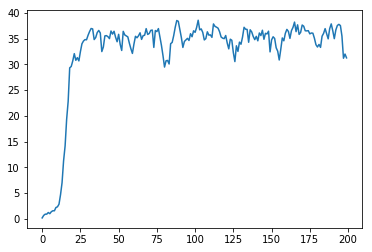

In [7]:
num_episodes = 200

scores_deque = deque(maxlen=100)
scores = []
ave_scores = []
max_score = -np.Inf
for i_episode in range(num_episodes):
    score = agent.steps()
    if num_agents != 1:
        score = np.array(score).mean()
    scores_deque.append(score)
    scores.append(score)
    ave_scores.append(np.array(scores_deque).mean())
    print("Eposode {}/ Score {}".format(i_episode,score))

plt.plot(scores)

Save the trained model

In [8]:
agent.save_model()

Make some plots.

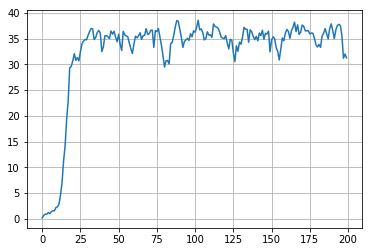

In [8]:
plt.plot(scores)
plt.grid(True)

[29.34918934399448, 29.70937433594372, 30.074369327785444, 30.450754319372585, 30.80845431137737, 31.164774303413, 31.516514295551, 31.849839288100608, 32.1840192806311, 32.531389272866775]


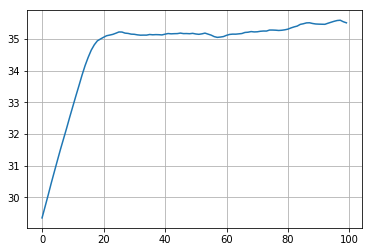

In [12]:
ave = []
for i in range(100):
    ave.append(np.array(scores[i:i+100]).mean())

print(ave[:10])
plt.plot(ave)
plt.grid(True)

### 5. Let's see how the trained model works.

In [10]:
from model import Actor

checkpoint = torch.load("checkpoint.pth")
trained_model = Actor(checkpoint["state_size"],
                      checkpoint["action_size"],
                      2,
                      checkpoint["hidden_layers"])
trained_model.load_state_dict(checkpoint["state_dict"])

In [16]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment    
states = np.array(env_info.vector_observations)    # get the current state
states = torch.from_numpy(states).float().to("cpu")
scores = np.zeros(num_agents)       # initialize the score (for each agent)
trained_model.eval()                # set train= False
while True:
    with torch.no_grad():
        actions = trained_model(states).cpu().data.numpy()
    env_info = env.step(actions)[brain_name]
    next_states = np.array(env_info.vector_observations)
    rewards = env_info.rewards
    dones = env_info.local_done
    scores += env_info.rewards
    states = torch.from_numpy(next_states).float().to("cpu")
    if np.any(dones):
        break
        
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 32.31199927777052


In [19]:
env.close()